<a href="https://colab.research.google.com/github/aria-mstj/ANN-Project/blob/main/Fruit_360_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Reading from dataset
First of all, we'll need a dataset to train our model but before adding that, we should add numpy library to our project. \\



In [ ]:
import numpy as np

In this project, I used Fruit-360 dataset which you can find [here](https://www.kaggle.com/moltean/fruits). To facilitate the work, only 4 types of fruit have been used in this project.\\ 
In our dataset, each class has about 491 pictures in 100 * 100 dimensions.Therefore, if we want to directly add image pixels to our neural network, our input layer will have 10000 neurons, which makes the network very heavy.For solving this problem 360 features have been extracted using feature extraction techniques.Then, using feature vector size reduction techniques, this size is reduced to 102, which we consider as the input of the neural network. Knowing that our model should eventually recognize one of four models of fruit, our output layer has 4 neurons that represents the predicted fruit. Our model also has two hidden layers, first with 150 neurons and second with 60 neurons.I used sigmoid function as activation function of all layers.
Our model structure looks like this :
![picture](https://drive.google.com/uc?export=view&id=1dws_Rl93GR5eHVx9f3Ma5nfT_dWzS2mg)

Our main idea is to work with train data and to evaluate it with test data.In each of our iterations we divide our data into mini batches, calculate the gradient of each batch, calculate its average and add then, apply changes. This approach results in lower computational complexity in each iteration and reduce total computation time.\\ 
For reading dataset, four datasets have been prepared, train_set_features.pkl, test_set_features.pkl, train_set_labels.pkl an test_set_labels.pkl. For reading datasets and reducing dimensions,
we construct two functions named ```get_testset``` and ```get_trainset```.




In [ ]:
import numpy as np
import random
import pickle


def get_trainset():
    f = open("new_train_set_features.pkl", "rb")
    train_set_features2 = pickle.load(f)
    f.close()

    # reducing feature vector length
    features_STDs = np.std(a=train_set_features2, axis=0)
    train_set_features = train_set_features2[:, features_STDs > 87]

    # changing the range of data between 0 and 1
    train_set_features = np.divide(train_set_features, train_set_features.max())

    # loading training set labels
    f = open("new_train_set_labels.pkl", "rb")
    train_set_labels = pickle.load(f)
    f.close()


    train_set = []

    for i in range(len(train_set_features)):
        label = np.array([0, 0, 0, 0, 0, 0, 0])
        label[int(train_set_labels[i])] = 1
        label = label.reshape(7, 1)
        train_set.append((train_set_features[i].reshape(60, 1), label))

    random.shuffle(train_set)

    return train_set

def get_testset():

    # loading test set features
    f = open("test_set_features.pkl", "rb")
    test_set_features2 = pickle.load(f)
    f.close()

    # reducing feature vector length
    features_STDs = np.std(a=test_set_features2, axis=0)
    test_set_features = test_set_features2[:, features_STDs > 80.1]

    # changing the range of data between 0 and 1
    test_set_features = np.divide(test_set_features, test_set_features.max())

    # loading test set labels
    f = open("test_set_labels.pkl", "rb")
    test_set_labels = pickle.load(f)
    f.close()

    # ------------
    test_set = []

    for i in range(len(test_set_features)):
        label = np.array([0, 0, 0, 0, 0, 0, 0])
        label[int(test_set_labels[i])] = 1
        label = label.reshape(7, 1)
        test_set.append((test_set_features[i].reshape(60, 1), label))

    # shuffle
    random.shuffle(test_set)

    # print(len(test_set)) #662
    return test_set


Adding local files to google colab.
You can find these files on git repository.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_test_set_features.pkl to new_test_set_features.pkl
Saving new_test_set_labels.pkl to new_test_set_labels.pkl
Saving new_train_set_features.pkl to new_train_set_features.pkl
Saving new_train_set_labels.pkl to new_train_set_labels.pkl


Calling our train function to make sure it works fine.

In [ ]:
train_set = np.array(get_trainset())
train_set.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(1962, 2)

First five features of first picture.

In [ ]:
train_set[0][0][:5]

array([[0.63082213],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# 2- Feed forward
In order to calculate the output of a neural network, each layers output is calculated based on following formula : \\

<center> $a ^ {(L+1)} = \sigma (W^{L+1} \times a^L + b^{L+1})$ 

<p align = left> Therefore, for weight and biases between layers we assign matrix. Weigth matrixes are shown with W_k, where k is the number of layer, and biases with b_k.

In [ ]:
feature_count = len(train_set[0][0])

first_layer_neurons = 150
second_layer_neurons = 60
output_neurons = len(train_set[0][1])

W_1 = np.random.randn(first_layer_neurons * feature_count).reshape(first_layer_neurons, feature_count)
b_1 = np.zeros((first_layer_neurons, 1))

W_2 = np.random.randn(second_layer_neurons * first_layer_neurons).reshape(second_layer_neurons, first_layer_neurons)
b_2 = np.zeros((second_layer_neurons, 1))

W_3 = np.random.randn(output_neurons * second_layer_neurons).reshape(output_neurons, second_layer_neurons)
b_3 = np.zeros((output_neurons, 1))


In [ ]:
def sigmoid(x):
   return 1 / (1 + np.exp(-x))

After initializing weights and biases and defining sigmoid function, we seperate first 200 images of our train dataset, and then calculate the output based in the formula.

For calculating the accuracy of our model, we compare the calculated output with label. We expect a mean of 25% accuracy because we assigned weight randomly and we have 4 different labels.

In [ ]:
X = [i[0] for i in train_set[:200]]
Y = [i[1] for i in train_set[:200]]
# print(len(Y[0]))
corrects = 0
for i, x in enumerate(X):
    # x = np.array(x)
    # print(x.shape)
    # print(W_1.shape)
    A1 = sigmoid(W_1 @ x + b_1)
    A2 = sigmoid(W_2 @ A1 + b_2)
    out = sigmoid(W_3 @ A2 + b_3)
    answer = list(out).index(max(out))
    # print(answer)
    # print(out)
    if answer == list(Y[i]).index(1):
        corrects += 1
    # print(out)

accuracy = (corrects / 200) * 100
print(accuracy)

23.0


# 3- Backpropagation
One of our main goals during the learning process is to minimize the cost function.

<center> $Cost = \sum_{j=0}^{n_L-1}(a_j^L - y_j) ^ 2$

<p align = left> In order to minimize the cost function, we use gradient descent, that means taking partial derivative of cost function for all variables.

<center> $ (W, b) = (W, b) - \alpha \triangle Cost$
<p align = left> We take derivatives with help of backpropagation.


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sig_pr(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

In [ ]:
train_set = get_trainset()
test_set = get_testset()
Xt = [i[0] for i in test_set]
Yt = [i[1] for i in test_set]

pics_count = 491
train_set = train_set[:200]
X = [i[0] for i in train_set]
Y = [i[1] for i in train_set]
feature_count = len(X[0])

W_1 = np.random.randn(150 * feature_count).reshape(150, feature_count)
b_1 = np.zeros((150, 1))

W_2 = np.random.randn(60 * 150).reshape(60, 150)
b_2 = np.zeros((60, 1))

W_3 = np.random.randn(4 * 60).reshape(4, 60)
b_3 = np.zeros((4, 1))

In [ ]:
corrects = 0
batch_size = 10
epochs = 5
learning_rate = 1
total_costs = []

Knowing we have four layers(one input layer, one output layer, two hidden layers), we should calculate derivatives as shown below:

We define cost, $a_j$ and $z_j$ as follows.

<center> $Cost = \sum_{j=0}^{3}(a_j^L - y_j) ^ 2$

$z_j^{(3)} = \sum_{j=0}^{3} w_{jk}^{(3)} a_k ^{2} + b_j^{(2)}$

$a_j^{(3)} = \sigma(z_j^{(3)})$


<p align = "left"> For weight and bias we apply derivative chain rule. 
</p>

<center> $\frac{\partial Cost}{\partial w_{jk}^{(3)}} = \frac{\partial Cost}{\partial a_j^{(3)}} \times \frac{\partial a_j^{(3)}}{\partial z_j^{(3)}} \times \frac{\partial z_j^{(3)}}{\partial w_{jk}^{(3)}} = 2(a_j^{(3)} - y_j) \times \sigma^{'}(z_j^{(3)}) \times a_k^{(2)}$


<center> $\frac{\partial Cost}{\partial b_{j}^{(3)}} = \frac{\partial Cost}{\partial a_j^{(3)}} \times \frac{\partial a_j^{(3)}}{\partial z_j^{(3)}} \times \frac{\partial z_j^{(3)}}{\partial b_{j}^{(3)}} = 2(a_j^{(3)} - y_j) \times \sigma^{'}(z_j^{(3)}) \times 1$

<center> $\frac{\partial Cost}{\partial a_{k}^{(2)}} = \sum_{j=0}^{59}\frac{\partial Cost}{\partial a_j^{(3)}} \times \frac{\partial a_j^{(3)}}{\partial z_j^{(3)}} \times \frac{\partial z_j^{(3)}}{\partial a_{k}^{(2)}} = \sum_{j=0}^{59}(2(a_j^{(3)} - y_j) \times \sigma^{'}(z_j^{(3)}) \times w_{jk}^{(3)})$



<center> $\frac{\partial Cost}{\partial w_{km}^{(2)}} = \frac{\partial Cost}{\partial a_k^{(2)}} \times \frac{\partial a_k^{(2)}}{\partial z_k^{(2)}} \times \frac{\partial z_k^{(2)}}{\partial w_{km}^{(2)}} = \frac{\partial Cost}{\partial a_k^{(2)}} \times \sigma^{'}(z_k^{(2)}) \times a_m^{(1)}$

<center> $\frac{\partial Cost}{\partial b_{k}^{(2)}} = \frac{\partial Cost}{\partial a_k^{(2)}} \times \frac{\partial a_k^{(2)}}{\partial z_k^{(2)}} \times \frac{\partial z_k^{(2)}}{\partial b_{k}^{(2)}} = \frac{\partial Cost}{\partial a_k^{(2)}} \times \sigma^{'}(z_k^{(2)}) \times 1$

<center> $\frac{\partial Cost}{\partial a_{m}^{(1)}} = \sum_{j=0}^{149}\frac{\partial Cost}{\partial a_k^{(2)}} \times \frac{\partial a_k^{(2)}}{\partial z_k^{(2)}} \times \frac{\partial z_k^{(2)}}{\partial a_{m}^{(1)}} = \sum_{j=0}^{149} (\frac{\partial Cost}{\partial a_k^{(2)}} \times \sigma^{'}(z_k^{(2)}) \times w_{km}^{(2)})$

<center> $\frac{\partial Cost}{\partial w_{mv}^{(1)}} = \frac{\partial Cost}{\partial a_m^{(1)}} \times \frac{\partial a_m^{(1)}}{\partial z_m^{(1)}} \times \frac{\partial z_m^{(1)}}{\partial w_{mv}^{(1)}} = \frac{\partial Cost}{\partial a_m^{(1)}} \times \sigma^{'}(z_m^{(1)}) \times a_v^{(0)}$

<center> $\frac{\partial Cost}{\partial b_{m}^{(1)}} = \frac{\partial Cost}{\partial a_m^{(1)}} \times \frac{\partial a_m^{(1)}}{\partial z_m^{(1)}} \times \frac{\partial z_m^{(1)}}{\partial b_{m}^{(1)}} = \frac{\partial Cost}{\partial a_m^{(1)}} \times \sigma^{'}(z_m^{(1)}) \times 1$


In [ ]:
for epoch in range(epochs):
    batches = []
    print("EPOCHS : ", epoch)
    for x in range(0, len(X), batch_size):
        batches.append(train_set[x:x+batch_size])
    for i, batch in enumerate(batches):
        # print(f"number of batch {i}")
        grad_w1 = np.zeros((150, feature_count))
        grad_w2 = np.zeros((60, 150))
        grad_w3 = np.zeros((4, 60))

        grad_b1 = np.zeros((150, 1))
        grad_b2 = np.zeros((60, 1))
        grad_b3 = np.zeros((4, 1))

        for x, y in batch:
            A1 = sigmoid(W_1 @ x + b_1)
            A2 = sigmoid(W_2 @ A1 + b_2)
            out = sigmoid(W_3 @ A2 + b_3)

            for j in range(grad_w3.shape[0]):
                for k in range(grad_w3.shape[1]):
                    grad_w3[j, k] += 2 * (out[j, 0] - y[j, 0]) * out[j, 0] * (1 - out[j, 0]) * A2[k, 0]

            for j in range(grad_w3.shape[0]):
                grad_b3[j, 0] += 2 * (out[j, 0] - y[j, 0]) * out[j, 0] * (1 - out[j, 0])

            delta_3 = np.zeros((grad_w3.shape[1], 1))
            for k in range(grad_w3.shape[1]):
                for j in range(grad_w3.shape[0]):
                    delta_3[k, 0] += 2 * (out[j, 0] - y[j, 0]) * out[j, 0] * (1 - out[j, 0]) * W_3[j, k]

            for k in range(grad_w2.shape[0]):
                for m in range(grad_w2.shape[1]):
                    # print(type(delta_3))
                    grad_w2[k, m] += delta_3[k, 0] * A2[k, 0] * (1 - A2[k, 0]) * A1[m, 0]

            for k in range(grad_w2.shape[0]):
                grad_b2[k, 0] += delta_3[k, 0] * A2[k, 0] * (1- A2[k, 0])

            delta_2 = np.zeros((grad_w2.shape[1], 1))
            for m in range(grad_w2.shape[1]):
                for k in range(grad_w2.shape[0]):
                    delta_2[m, 0] += delta_3[k, 0] * A2[k, 0] * (1 - A2[k, 0]) * W_2[k, m]

            for m in range(grad_w1.shape[0]):
                for v in range(grad_w1.shape[1]):
                    grad_w1[m, v] += delta_2[m, 0] * A1[m, 0] * (1 - A1[m, 0]) * x[v, 0]

            for m in range(grad_w1.shape[0]):
                grad_b1[m, 0] += delta_2[m, 0] * A1[m, 0] * (1 - A1[m, 0])

        # print(grad_w3)
        W_3 = W_3 - (learning_rate * (grad_w3 / batch_size))
        W_2 = W_2 - (learning_rate * (grad_w2 / batch_size))
        W_1 = W_1 - (learning_rate * (grad_w1 / batch_size))

        b_3 = b_3 - (learning_rate * (grad_b3 / batch_size))
        b_2 = b_2 - (learning_rate * (grad_b2 / batch_size))
        b_1 = b_1 - (learning_rate * (grad_b1 / batch_size))

    cost = 0
    for train_data in train_set:
        a0 = train_data[0]
        a1 = sigmoid(W_1 @ a0 + b_1)
        a2 = sigmoid(W_2 @ a1 + b_2)
        a3 = sigmoid(W_3 @ a2 + b_3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j, 0]), 2)

    print(cost)
    cost /= 100
    total_costs.append(cost)


EPOCHS :  0
228.072669577029
EPOCHS :  1
186.08422480982878
EPOCHS :  2
58.305654864043596
EPOCHS :  3
18.902652986284277
EPOCHS :  4
14.03246537479083


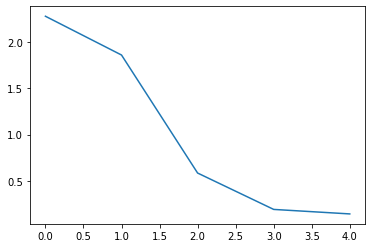

In [ ]:
epoch_size = [x for x in range(epochs)]
plt.plot(epoch_size, total_costs)
plt.show()

In [ ]:
corrects = 0

for i, test_data in enumerate(Xt):
    a0 = test_data
    a1 = sigmoid(W_1 @ a0 + b_1)
    a2 = sigmoid(W_2 @ a1 + b_2)
    a3 = sigmoid(W_3 @ a2 + b_3)
    # print(f"TEST : {Yt[i]}, PREDICT : {a3}")

    predicted_number = list(a3).index(max(a3))
    real_number = list(Yt[i]).index(1)

    if predicted_number == real_number:
        corrects += 1
accuracy = corrects / len(Xt)
print("Accuracy = ", accuracy)

Accuracy =  0.9969788519637462


# 4- Vectorization
For the reason of long execution time, until now we have worked with first 200 pics and ran our code for only 5 epochs. For solving this problem we can use vectorization instead of for loops.

As a result, the processing time would be reduced significantly.The explanation for this is that matrix operations can run in parallel on multi-core CPUs. Furthermore, today's processors have instructions for working with large vector data, which will be much more effective.


---
In vectorized notation, we define cost, $a_j$ and $z_j$ as follows.

<center> $Cost = (\overrightarrow{a^{(3)}} - \overrightarrow{y}) ^ T$

<center> $\overrightarrow{a}^{(3)} = \sigma(\overrightarrow{z}^{(3)})$

<center> $\overrightarrow{z}^{(3)} = W^{(3)}\overrightarrow{a}^{(2)} + \overrightarrow{b}^{(2)}$

<p align = "left"> For weight and bias we apply derivative chain rule. 
</p>

<center> ${a^{(3)}}^{(')} = a^{(3)}(1 - a^{(3)}) $

<center> $\frac{\partial Cost}{\partial W^{(3)}} = 2(\overrightarrow{a}^{(3)} - \overrightarrow{y}) \overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)}) \cdot \overrightarrow{a}^{(2)}  $ 


<center> $\frac{\partial Cost}{\partial b^{(3)}} = 2(\overrightarrow{a}^{(3)} - \overrightarrow{y}) \overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)}) $


<center> $\frac{\partial Cost}{\partial a^{(2)}} = {W^{(3)}}^T (2(\overrightarrow{a}^{(3)} - \overrightarrow{y}) \overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)}))  $ 

<center> $\frac{\partial Cost}{\partial W^{(2)}} = \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}} \overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)}) \cdot \overrightarrow{a}^{(1)}  $ 

<center> $\frac{\partial Cost}{\partial b^{(2)}} = \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}} \overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)})  $

<center> $\frac{\partial Cost}{\partial a^{(1)}} = {W^{(2)}}^T \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}} \overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)})$

<center> $\frac{\partial Cost}{\partial W^{(1)}} = \frac{\partial Cost}{\partial \overrightarrow{a}^{(1)}} \overrightarrow{a}^{(1)}(1 - \overrightarrow{a}^{(1)}) \cdot \overrightarrow{a}^{(0)}  $ 

<center> $\frac{\partial Cost}{\partial b^{(1)}} = \frac{\partial Cost}{\partial \overrightarrow{a}^{(1)}} \overrightarrow{a}^{(1)}(1 - \overrightarrow{a}^{(1)})  $ 



In [ ]:
def sigmoid(x):
   return 1 / (1 + np.exp(-x))


def sig_pr(x):
    s = sigmoid(x)
    return s * (1 - s)

In [ ]:
def backpropagation(W_1, W_2, W_3, b_1, b_2, b_3, A1, A2, out, Y, X):
    dout = 2 * (out - Y)
    
    dout_dw3 = sig_pr(W_3 @ A2 + b_3) @ A2.transpose()
    d_w3 = np.array(dout * dout_dw3)
    d_b3 = dout * sig_pr(W_3 @ A2 + b_3)

    dout_da2 = W_3.transpose() @ sig_pr(W_3 @ A2 + b_3)
    da2_dw2 = sig_pr(W_2 @ A1 + b_2) @ A1.transpose()
    da2 = W_3.transpose() @ (dout * sig_pr(W_3 @ A2 + b_3))


    d_w2 = da2 * da2_dw2
    d_b2 = da2 * sig_pr(W_2 @ A1 + b_2)

    da2_da1 = W_2.transpose() @ sig_pr(W_2 @ A1 + b_2)
    da1_dw1 = sig_pr(W_1 @ X + b_1) @ X.transpose()

    da1 = W_2.transpose() @ (da2 * sig_pr(W_2 @ A1 + b_2))
    d_w1 = da1 * da1_dw1
    d_b1 = da1 * sig_pr(W_1 @ X + b_1)

    return d_w1, d_w2, d_w3, d_b1, d_b2, d_b3


In [ ]:
pics_count = 491# 100 * 100

test_set = get_testset()
train_set = get_trainset()

feature_count = len(train_set[0][0])

first_layer_neurons = 150
second_layer_neurons = 60
output_neurons = len(train_set[0][1])

W_1 = np.random.randn(first_layer_neurons * feature_count).reshape(first_layer_neurons, feature_count)
b_1 = np.zeros((first_layer_neurons, 1))

W_2 = np.random.randn(second_layer_neurons * first_layer_neurons).reshape(second_layer_neurons, first_layer_neurons)
b_2 = np.zeros((second_layer_neurons, 1))

W_3 = np.random.randn(output_neurons * second_layer_neurons).reshape(output_neurons, second_layer_neurons)
b_3 = np.zeros((output_neurons, 1))

# print(len(test_set[0][0]))
X = [i[0] for i in train_set]
Y = [i[1] for i in train_set]

Xt = [i[0] for i in test_set]
Yt = [i[1] for i in test_set]


In [ ]:
batch_size = 10
epochs = 20
learning_rate = 1
total_costs = []

In [ ]:
for epoch in range(epochs):
    batches = []
    print("EPOCHS : ", epoch)


    for x in range(0, len(X), batch_size):
        batches.append(train_set[x:x+batch_size])
    for i, batch in enumerate(batches):
        # print(f"number of batch {i}")
        grad_w1 = np.zeros((150, feature_count))
        grad_w2 = np.zeros((60, 150))
        grad_w3 = np.zeros((4, 60))

        grad_b1 = np.zeros((150, 1))
        grad_b2 = np.zeros((60, 1))
        grad_b3 = np.zeros((4, 1))


        for x, y in batch:
            A1 = sigmoid(W_1 @ x + b_1)
            A2 = sigmoid(W_2 @ A1 + b_2)
            out = sigmoid(W_3 @ A2 + b_3)
            # print(W_3.shape)

            gw1, gw2, gw3, gb1, gb2, gb3 = backpropagation(W_1, W_2, W_3, b_1, b_2, b_3, A1, A2, out
                                                                                       , y, x)
            grad_w1 += gw1
            grad_w2 += gw2
            grad_w3 += gw3

            grad_b1 += gb1
            grad_b2 += gb2
            grad_b3 += gb3

        W_3 = W_3 - (learning_rate * (grad_w3 / batch_size))
        W_2 = W_2 - (learning_rate * (grad_w2 / batch_size))
        W_1 = W_1 - (learning_rate * (grad_w1 / batch_size))

        b_3 = b_3 - (learning_rate * (grad_b3 / batch_size))
        b_2 = b_2 - (learning_rate * (grad_b2 / batch_size))
        b_1 = b_1 - (learning_rate * (grad_b1 / batch_size))

    cost = 0
    for train_data in train_set:
        a0 = train_data[0]
        a1 = sigmoid(W_1 @ a0 + b_1)
        a2 = sigmoid(W_2 @ a1 + b_2)
        a3 = sigmoid(W_3 @ a2 + b_3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j, 0]), 2)

    print(cost)
    cost /= 100
    total_costs.append(cost)


EPOCHS :  0
909.9022062294101
EPOCHS :  1
432.53535653830863
EPOCHS :  2
10.728924856794457
EPOCHS :  3
5.974781374636026
EPOCHS :  4
3.958955565568569
EPOCHS :  5
2.8823231269056038
EPOCHS :  6
2.244289774871596
EPOCHS :  7
1.8295328747425292
EPOCHS :  8
1.5398453603640996
EPOCHS :  9
1.3265250372097082
EPOCHS :  10
1.163174351129536
EPOCHS :  11
1.034308099303847
EPOCHS :  12
0.9302329124549542
EPOCHS :  13
0.8445594205043385
EPOCHS :  14
0.7729004723783345
EPOCHS :  15
0.7121436520891223
EPOCHS :  16
0.6600212770210372
EPOCHS :  17
0.614844038533686
EPOCHS :  18
0.5753294716153631
EPOCHS :  19
0.5404878685354936


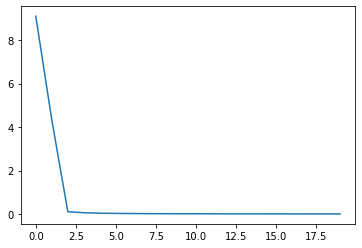

In [ ]:
epoch_size = [x for x in range(epochs)]
plt.plot(epoch_size, total_costs)
plt.savefig('20_epoch_Vectorization.png')
plt.show()

In [ ]:
corrects = 0


for i, x in enumerate(Xt):
    A1 = sigmoid(W_1 @ x + b_1)
    A2 = sigmoid(W_2 @ A1 + b_2)
    out = sigmoid(W_3 @ A2 + b_3)
    predicted_number = list(out).index(max(out))
    real_number = list(Yt[i]).index(1)

    if predicted_number == real_number:
        corrects += 1
accuracy = corrects / len(Xt)
print("TEST Accuracy = ", accuracy)
corrects = 0


TEST Accuracy =  1.0


At this level I runned my code 10 times with 10 epochs and 1 learning rate and plotted the result.
Result was as shown below :
![picture](https://drive.google.com/uc?export=view&id=1VDQuW70V7ukMDDGvxJGv592bhTn-Wgph)


As you can see, accuracy is equal to 100%. The reason is that the data features of labels are very different.

Usually setting 1 for learning rate is not a good choice. It could result in underfitting. Having a less learning rate, about 0.1 in this model, will recude the slope of error chart, but the final result will have a higher accuracy, but in this significant project, since our accuracy is already 100%, we cannot have a higher accuracy.
After running code for several times, I found out that the my code reach its maximum accuracy(100%) after maximum of 10-15 epochs.

## 5- Improving gradient descent
A problem with the gradient descent algorithm is that the progression of the search can bounce around the search space based on the gradient. For example, the search may progress downhill towards the minima, but during this progression, it may move in another direction, even uphill, depending on the gradient of specific points (sets of parameters) encountered during the search. This can slow down the progress of the search.

One approach to this problem is adding the history of the parameter update.

First, let’s break the gradient descent update equation down into two parts: the calculation of the change to the position and the update of the old position to the new position.

The change in the parameters is calculated as the gradient for the point scaled by the alpha.
In last approach we had :

<center> $ (W, b) = (W, b) - \alpha \triangle Cost$

<p align = left> For our new approach, we need to use history, we define $VdW$ as shown below:

<center> $VdW = \beta VdW + (1 - \beta)dW$
<center> $Vdb = \beta Vdb + (1 - \beta)db$
<center> $ W = W - \alpha VdW$
<center> $ b = b - \alpha Vdb$

<p align = left>Where beta ‘β’ is a different hyperparameter called momentum, ranging from 0 to 1. To calculate the new weighted average, it sets the weight between the average of previous values and the current value.

 So we rerun the model with new sohpisticated gradient descent. 
At first we assign optima variable with 0.75 value, meaning that our new gradient descent has only 25% effect on our Weights and biases.

<p align = left>

```
VdW3 = VdW3 * optima + (1 - optima) * (grad_w3 / batch_size)
W_3 = W_3 - (learning_rate * VdW3)
VdW2 = VdW2 * optima + (1 - optima) * (grad_w2 / batch_size)
W_2 = W_2 - (learning_rate * VdW2)
VdW1= VdW1 * optima + (1 - optima) * (grad_w1 / batch_size)
W_1 = W_1 - (learning_rate * VdW1)

Vdb3 = Vdb3 * optima + (1 - optima) * (grad_b3 / batch_size)
b_3 = b_3 - (learning_rate * Vdb3)
Vdb2 = Vdb2 * optima + (1 - optima) * (grad_b2 / batch_size)
b_2 = b_2 - (learning_rate * Vdb2)
Vdb1= Vdb1 * optima + (1 - optima) * (grad_b1 / batch_size)
b_1 = b_1 - (learning_rate * Vdb1)

```
<p align = left> You can find the code in sophisticated_gradient_descent.py, the result are the same but the cost reduction rate is much higher.


# 6- Adding more fruits

Now its time to test our model with bigger dataset. So I add three more fruits including avocado, banana and strawberry. For extracting features I used this feature extraction as shown below :



```
import numpy
import skimage.io, skimage.color, skimage.feature
import os
import pickle

fruits = ["apple", "avocado", "banana", "lemon", "mango", "raspberry", "strawberry"]
#492 + 427 + 490 + 490 + 490 + 490 + 492 = 3,371
dataset_features = numpy.zeros(shape=(3371, 360))
outputs = numpy.zeros(shape=(3371))

idx = 0
class_label = 0
for fruit_dir in fruits:
    curr_dir = os.path.join(os.path.sep + "Datasets/Fruits-360/Train", fruit_dir)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for img_file in all_imgs:
        if img_file.endswith(".jpg"):  # Ensures reading only JPG files.
            fruit_data = skimage.io.imread(fname=os.path.sep.join([os.getcwd(), curr_dir, img_file]), as_gray=False)
            fruit_data_hsv = skimage.color.rgb2hsv(rgb=fruit_data)
            hist = numpy.histogram(a=fruit_data_hsv[:, :, 0], bins=360)
            dataset_features[idx, :] = hist[0]
            outputs[idx] = class_label
            idx = idx + 1
    class_label = class_label + 1

with open("Datasets/new_train_set_features.pkl", "wb") as f:
    pickle.dump(dataset_features, f)

with open("Datasets/new_train_set_labels.pkl", "wb") as f:
    pickle.dump(outputs, f)

```
After adding new data to our dataset, my accuracy decreased a little. I wrote the full code after section 7.

# 7- Using softmax classifier for output layer
Softmax classifer is usually used to normalize the output layer and making it a probabalistic distribution. For this purpose we define softmax function :


```
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()
```

In sophisticated_gradient_descent.py, you can look at all new changes(including  adding new fruit, example of overfitting and usage of momentum in gradient descent but not softmax activation function).


Now let's look at the results when input layer has 60 neurons(to make the learning process faster), 100 neurons for first layer, 50 neurons for second layer, 0.05 for learning rate, 0.9 for optima, 8 for batch_size and running the code for 15 epochs.

At first we need a new loading dataset.

In [13]:
import numpy as np
import random
import pickle


def get_trainset():
    f = open("new_train_set_features.pkl", "rb")
    train_set_features2 = pickle.load(f)
    f.close()

    # reducing feature vector length
    features_STDs = np.std(a=train_set_features2, axis=0)
    train_set_features = train_set_features2[:, features_STDs > 87]

    # changing the range of data between 0 and 1
    train_set_features = np.divide(train_set_features, train_set_features.max())

    # loading training set labels
    f = open("new_train_set_labels.pkl", "rb")
    train_set_labels = pickle.load(f)
    f.close()


    train_set = []

    for i in range(len(train_set_features)):
        label = np.array([0, 0, 0, 0, 0, 0, 0])
        label[int(train_set_labels[i])] = 1
        label = label.reshape(7, 1)
        train_set.append((train_set_features[i].reshape(60, 1), label))

    random.shuffle(train_set)

    return train_set

def get_testset():

    # loading test set features
    f = open("new_test_set_features.pkl", "rb")
    test_set_features2 = pickle.load(f)
    f.close()

    # reducing feature vector length
    features_STDs = np.std(a=test_set_features2, axis=0)
    test_set_features = test_set_features2[:, features_STDs > 84.1]

    # changing the range of data between 0 and 1
    test_set_features = np.divide(test_set_features, test_set_features.max())

    # loading test set labels
    f = open("new_test_set_labels.pkl", "rb")
    test_set_labels = pickle.load(f)
    f.close()

    # ------------
    test_set = []

    for i in range(len(test_set_features)):
        label = np.array([0, 0, 0, 0, 0, 0, 0])
        label[int(test_set_labels[i])] = 1
        label = label.reshape(7, 1)
        test_set.append((test_set_features[i].reshape(60, 1), label))

    # shuffle
    random.shuffle(test_set)

    # print(len(test_set)) #662
    return test_set


TEST Accuracy of 0 =  0.983981014535746


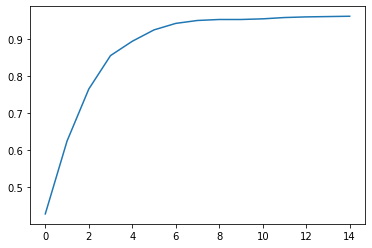

TEST Accuracy of 1 =  0.6796202907149214


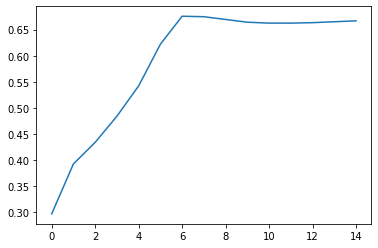

TEST Accuracy of 2 =  0.8407000889943637


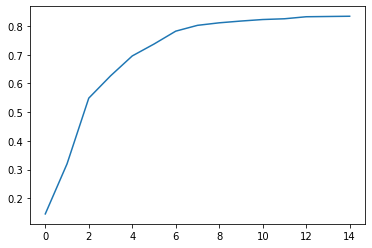

TEST Accuracy of 3 =  0.9952536339365173


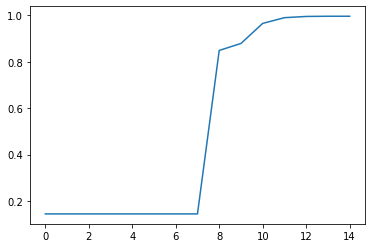

TEST Accuracy of 4 =  0.9596558884603975


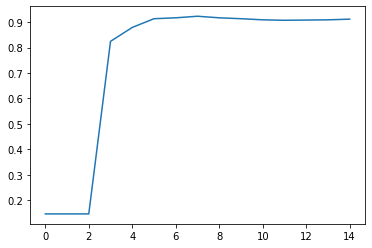

TEST Accuracy of 5 =  0.9949569860575497


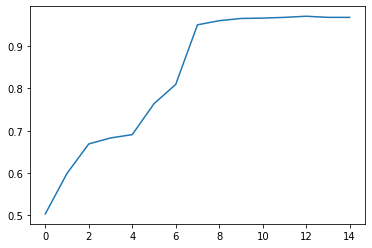

TEST Accuracy of 6 =  0.9783447048353604


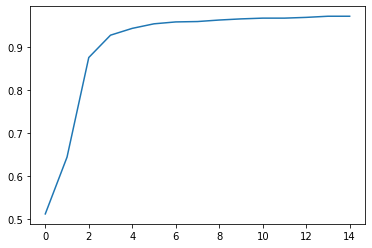

TEST Accuracy of 7 =  0.7181845149807179


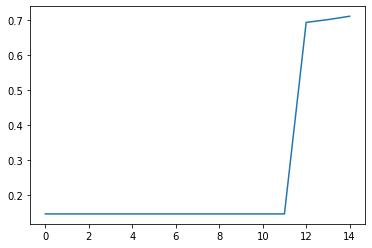

TEST Accuracy of 8 =  0.983981014535746


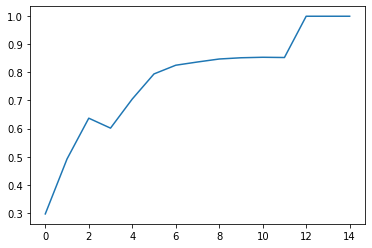

TEST Accuracy of 9 =  0.99110056363097


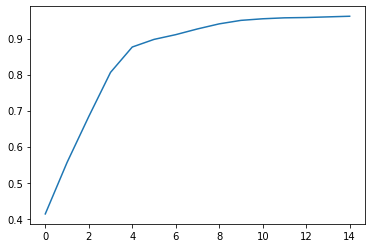

Mean of 10 runs =  0.9125778700682291


In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt


def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sig_pr(x):
    s = sigmoid(x)
    return s * (1 - s)


def backpropagation(W_1, W_2, W_3, b_1, b_2, b_3, A1, A2, out, Y, X):
    dout = 2 * (out - Y)
    
    dout_dw3 = sig_pr(W_3 @ A2 + b_3) @ A2.transpose()
    
    d_w3 = np.array(dout * dout_dw3)
    
    d_b3 = dout * sig_pr(W_3 @ A2 + b_3)

    dout_da2 = W_3.transpose() @ sig_pr(W_3 @ A2 + b_3)
    da2_dw2 = sig_pr(W_2 @ A1 + b_2) @ A1.transpose()
    da2 = W_3.transpose() @ (dout * sig_pr(W_3 @ A2 + b_3))
    
    d_w2 = da2 * da2_dw2
    d_b2 = da2 * sig_pr(W_2 @ A1 + b_2)

    da2_da1 = W_2.transpose() @ sig_pr(W_2 @ A1 + b_2)
    da1_dw1 = sig_pr(W_1 @ X + b_1) @ X.transpose()
    
    da1 = W_2.transpose() @ (da2 * sig_pr(W_2 @ A1 + b_2))
    d_w1 = da1 * da1_dw1
    d_b1 = da1 * sig_pr(W_1 @ X + b_1)

    return d_w1, d_w2, d_w3, d_b1, d_b2, d_b3

mean = 0
for m in range(10):

    test_set = get_testset()
    train_set = get_trainset()

    feature_count = len(train_set[0][0])

    first_layer_neurons = 100
    second_layer_neurons = 50
    output_neurons = len(train_set[0][1])

    W_1 = np.random.randn(first_layer_neurons * feature_count).reshape(first_layer_neurons, feature_count)
    b_1 = np.zeros((first_layer_neurons, 1))

    W_2 = np.random.randn(second_layer_neurons * first_layer_neurons).reshape(second_layer_neurons, first_layer_neurons)
    b_2 = np.zeros((second_layer_neurons, 1))

    W_3 = np.random.randn(output_neurons * second_layer_neurons).reshape(output_neurons, second_layer_neurons)
    b_3 = np.zeros((output_neurons, 1))

    X = [i[0] for i in train_set]
    Y = [i[1] for i in train_set]

    Xt = [i[0] for i in test_set]
    Yt = [i[1] for i in test_set]


    batch_size = 8
    epochs = 15
    learning_rate = 0.05
    total_costs = []
    optima = 0.9
    test_accs = []
    train_accs = []

    for epoch in range(epochs):
        batches = []
        # print("EPOCHS : ", epoch)

        for x in range(0, len(X), batch_size):
            batches.append(train_set[x:x + batch_size])
        VdW3 = 0
        VdW2 = 0
        VdW1 = 0
        Vdb3 = 0
        Vdb2 = 0
        Vdb1 = 0

        for i, batch in enumerate(batches):
            
            grad_w1 = np.zeros((first_layer_neurons, feature_count))
            grad_w2 = np.zeros((second_layer_neurons, first_layer_neurons))
            grad_w3 = np.zeros((output_neurons, second_layer_neurons))

            grad_b1 = np.zeros((first_layer_neurons, 1))
            grad_b2 = np.zeros((second_layer_neurons, 1))
            grad_b3 = np.zeros((output_neurons, 1))

            for x, y in batch:
                A1 = sigmoid(W_1 @ x + b_1)
                A2 = sigmoid(W_2 @ A1 + b_2)
                out = sigmoid(W_3 @ A2 + b_3)
    
                gw1, gw2, gw3, gb1, gb2, gb3 = backpropagation(W_1, W_2, W_3, b_1, b_2, b_3, A1, A2, out
                                                               , y, x)
                grad_w1 += gw1
                grad_w2 += gw2
                grad_w3 += gw3

                grad_b1 += gb1
                grad_b2 += gb2
                grad_b3 += gb3

            VdW3 = VdW3 * optima + (1 - optima) * (grad_w3 / batch_size)
            W_3 = W_3 - (learning_rate * VdW3)
            VdW2 = VdW2 * optima + (1 - optima) * (grad_w2 / batch_size)
            W_2 = W_2 - (learning_rate * VdW2)
            VdW1 = VdW1 * optima + (1 - optima) * (grad_w1 / batch_size)
            W_1 = W_1 - (learning_rate * VdW1)

            Vdb3 = Vdb3 * optima + (1 - optima) * (grad_b3 / batch_size)
            b_3 = b_3 - (learning_rate * Vdb3)
            Vdb2 = Vdb2 * optima + (1 - optima) * (grad_b2 / batch_size)
            b_2 = b_2 - (learning_rate * Vdb2)
            Vdb1 = Vdb1 * optima + (1 - optima) * (grad_b1 / batch_size)
            b_1 = b_1 - (learning_rate * Vdb1)

        cost = 0
        for train_data in train_set:
            a0 = train_data[0]
            a1 = sigmoid(W_1 @ a0 + b_1)
            a2 = sigmoid(W_2 @ a1 + b_2)
            a3 = sigmoid(W_3 @ a2 + b_3)

            for j in range(output_neurons):
                cost += np.power((a3[j, 0] - train_data[1][j, 0]), 2)

        # print(cost)
        cost /= 100
        total_costs.append(cost)
        corrects = 0
        for i, x in enumerate(Xt):
            
            A1 = sigmoid(W_1 @ x + b_1)
            A2 = sigmoid(W_2 @ A1 + b_2)
            out = softmax(W_3 @ A2 + b_3)
            
            predicted_number = list(out).index(max(out))
            real_number = list(Yt[i]).index(1)

            if predicted_number == real_number:
                corrects += 1
        accuracy = corrects / len(Xt)
        
        test_accs.append(accuracy)

    corrects = 0
    for i, x in enumerate(X):
        
        A1 = sigmoid(W_1 @ x + b_1)
        A2 = sigmoid(W_2 @ A1 + b_2)
        out = sigmoid(W_3 @ A2 + b_3)
        
        predicted_number = list(out).index(max(out))
        real_number = list(Y[i]).index(1)

        if predicted_number == real_number:
            corrects += 1
    accuracy = corrects / len(X)
    print(f"TEST Accuracy of {m} = ", accuracy)
    mean += accuracy

    epoch_size = [x for x in range(epochs)]
    plt.plot(epoch_size, test_accs)
    
    plt.show()

mean /= 10
print("Mean of 10 runs = ", mean)